# Lead Scoring Case Study

## Getting Data

In [2]:
# ignoring Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importing required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

lead = pd.read_csv("Leads.csv")

In [6]:
lead.head(20)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.00,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [7]:
#shape
print(lead.shape)

(9240, 37)


In [8]:
#columns
print(lead.columns)

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [9]:
#datatypes
print(lead.dtypes)

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [10]:
#info
print(lead.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [11]:
#describe
print(lead.describe())

         Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     

## Cleaning Data

In [12]:
#Analysing columns with "Select" variable in the df
colsHavingSelect = lead.isin(["Select"]).any()
print(colsHavingSelect)

Prospect ID                                      False
Lead Number                                      False
Lead Origin                                      False
Lead Source                                      False
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                      False
Total Time Spent on Website                      False
Page Views Per Visit                             False
Last Activity                                    False
Country                                          False
Specialization                                    True
How did you hear about X Education                True
What is your current occupation                  False
What matters most to you in choosing a course    False
Search                                           False
Magazine                                         False
Newspaper 

In [13]:
#replace occurances of the given string to missing values
lead.replace('Select', np.nan,inplace=True)

### Calculation of missing value percentage in each column

In [14]:
#% of missing values in each column
nullseries = round(lead.isnull().sum() * 100 / len(lead),2)

print(nullseries)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### There are high missing value percentages in many columns and we must remove them.

In [15]:
#Dropping all unnecessary score variables in the df
lead.drop(['Tags', 'Lead Quality', 'Lead Profile','Asymmetrique Activity Index', 'Asymmetrique Profile Index','Asymmetrique Profile Score','Asymmetrique Activity Score'],axis=1,inplace=True)

In [16]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [17]:
#Dropping all unnecessary variables in the df
lead.drop('Last Notable Activity', axis = 1, inplace=True)

In [18]:
# % of missing values in each column.
nullseries = round(lead.isnull().sum() * 100 / len(lead),2)

print(nullseries)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [19]:
#Checking columns having null value greater than or equal to 39%
print(nullseries[nullseries >= 39])

How did you hear about X Education    78.46
City                                  39.71
dtype: float64


In [20]:
#Dropping all columns having a missing value percentage greater than 39%
lead = lead.drop(lead.loc[:,list((100*(lead.isnull().sum()/len(lead.index))>=39))].columns, 1)

In [21]:
#% of missing values in each column.
nullseries = round(lead.isnull().sum() * 100 / len(lead),2)
print(nullseries)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [22]:
#Checking uniqueness

lead['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

In [23]:
#Checking uniqueness
lead['Lead Source'].value_counts(normalize=True)

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64

In [24]:
#Checking uniqueness
lead['Do Not Email'].value_counts(normalize=True)

No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64

In [25]:
#Checking uniqueness
lead['Do Not Call'].value_counts(normalize=True)

No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64

In [26]:
#Checking uniqueness
lead['Last Activity'].value_counts(normalize=True)

Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Received                  0.000219
Email Marked Spam               0.000219
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: Last Activity, dtype: float64

In [27]:
#Checking uniqueness
lead['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

In [28]:
#Checking uniqueness
lead['Specialization'].value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

In [29]:
#Checking uniqueness
lead['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [30]:
#Checking uniqueness
lead['What matters most to you in choosing a course'].value_counts(normalize=True) 

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

In [31]:
#Checking uniqueness
lead['Search'].value_counts(normalize=True) 

No     0.998485
Yes    0.001515
Name: Search, dtype: float64

In [32]:
#Checking uniqueness
lead['Magazine'].value_counts(normalize=True) 

No    1.0
Name: Magazine, dtype: float64

In [33]:
#Checking uniqueness
lead['Newspaper Article'].value_counts(normalize=True) 

No     0.999784
Yes    0.000216
Name: Newspaper Article, dtype: float64

In [34]:
#Checking uniqueness
lead['X Education Forums'].value_counts(normalize=True) 

No     0.999892
Yes    0.000108
Name: X Education Forums, dtype: float64

In [35]:
#Checking uniqueness
lead['Digital Advertisement'].value_counts(normalize=True) 

No     0.999567
Yes    0.000433
Name: Digital Advertisement, dtype: float64

In [36]:
#Checking uniqueness
lead['Through Recommendations'].value_counts(normalize=True) 

No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64

In [37]:
#Checking uniqueness
lead['Receive More Updates About Our Courses'].value_counts(normalize=True) 

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

In [38]:
#Checking uniqueness
lead['Get updates on DM Content'].value_counts(normalize=True) 

No    1.0
Name: Get updates on DM Content, dtype: float64

In [39]:
#Checking uniqueness
lead['Update me on Supply Chain Content'].value_counts(normalize=True) 

No    1.0
Name: Update me on Supply Chain Content, dtype: float64

In [40]:
#Checking uniqueness
lead['I agree to pay the amount through cheque'].value_counts(normalize=True) 

No    1.0
Name: I agree to pay the amount through cheque, dtype: float64

In [41]:
#Checking uniqueness
lead['A free copy of Mastering The Interview'].value_counts(normalize=True) 

No     0.687446
Yes    0.312554
Name: A free copy of Mastering The Interview, dtype: float64

** Dropping Highly Skewed Columns, following columns to be dropped: **
- Do Not Email
- Do Not Call
- Newspaper
- Digital Advertisement 
- Through Recommendations
- Receive More Updates About Our Courses 
- Update me on Supply Chain Content
- Get updates on DM Content 
- I agree to pay the amount through cheque
- Country 
- What matters most to you in choosing a course 
- Search
- Magazine
- Newspaper Article  
- X Education Forums

In [42]:
#dropping above columns
lead.drop(['Do Not Email','Do Not Call','Newspaper','Digital Advertisement','Through Recommendations',
'Receive More Updates About Our Courses', 'Update me on Supply Chain Content','Get updates on DM Content', 
'I agree to pay the amount through cheque' ,'Country','What matters most to you in choosing a course', 
'Search','Magazine','Newspaper Article', 'X Education Forums'],axis=1, inplace=True)

In [43]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [44]:
#% of missing values in each column
nullseries = round(lead.isnull().sum() * 100 / len(lead),2)

print(nullseries)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            36.58
What is your current occupation           29.11
A free copy of Mastering The Interview     0.00
dtype: float64


In [45]:
print(len(lead.columns))

12


### Combining columns having low percentages into one a single column

- Lead Origin
- Lead Source
- Last Activity
- Specialization
- What is your current occupation



**Lead Origin**

In [46]:
lead['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

In [47]:
lead['Lead Origin'] = lead['Lead Origin'].replace(['Lead Import','Quick Add Form'] ,'Others')

In [48]:
#Check if the category has been correctly replaced or not 
lead['Lead Origin'].value_counts(normalize=True) 

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Others                     0.006061
Name: Lead Origin, dtype: float64

**Lead Source**

In [49]:
lead['Lead Source'].value_counts(normalize=True)

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64

In [50]:
#Combining categories
lead['Lead Source'] = lead['Lead Source'].replace(['Welingak Website','Referral Sites','Facebook','bing','google','Click2call', 
                                                   'Press_Release','Social Media','Live Chat','Pay per Click Ads','blog','WeLearn',
                                                   'youtubechannel','testone','NC_EDM' ,'welearnblog_Home'] ,'Others')

In [52]:
#Analysing Lead Source column

lead['Lead Source'].value_counts(normalize=True)

Google            0.311604
Direct Traffic    0.276293
Olark Chat        0.190678
Organic Search    0.125380
Reference         0.058018
Others            0.038027
Name: Lead Source, dtype: float64

####  **Last Activity**

In [53]:
#Analysing 'Last Activity' column
lead['Last Activity'].value_counts(normalize=True) 

Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Received                  0.000219
Email Marked Spam               0.000219
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: Last Activity, dtype: float64

In [54]:
# Combining to form 'Others' Categories

lead['Last Activity']=lead['Last Activity'].replace(['Form Submitted on Website'      ,
'Unreachable'                    ,
'Unsubscribed'                   ,
'Had a Phone Conversation'       ,
'Approached upfront'             ,
'View in browser link Clicked'   ,
'Email Received'                 ,
'Email Marked Spam'              ,
'Visited Booth in Tradeshow'     ,
'Resubscribed to emails'],'Others') 

In [55]:
#Analysing 'Last Activity' column
lead['Last Activity'].value_counts(normalize=True)

Email Opened               0.376163
SMS Sent                   0.300427
Olark Chat Conversation    0.106490
Page Visited on Website    0.070045
Converted to Lead          0.046843
Email Bounced              0.035679
Others                     0.035132
Email Link Clicked         0.029222
Name: Last Activity, dtype: float64

**Specialization**

In [56]:
#Analysing the specialization column

lead['Specialization'].value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

In [57]:
#Combining categories < 2%  into 'Others'

lead['Specialization']=lead['Specialization'].replace(['Rural and Agribusiness','E-Business','Services Excellence','Hospitality Management','E-COMMERCE','Retail Management'],'Others')      

In [58]:
#Analysing the column again to recheck the same.

lead['Specialization'].value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Others                               0.084642
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Media and Advertising                0.034642
Travel and Tourism                   0.034642
International Business               0.030375
Healthcare Management                0.027133
Name: Specialization, dtype: float64

In [59]:
lead.Specialization.fillna('Not Specified', inplace=True)

In [60]:
#Analysing the column again to recheck the same.
lead['Specialization'].value_counts(normalize=True)

Not Specified                        0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Others                               0.053680
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Media and Advertising                0.021970
Travel and Tourism                   0.021970
International Business               0.019264
Healthcare Management                0.017208
Name: Specialization, dtype: float64

**Current Occupation**

In [61]:
#Analysing value counts for Current Occupation
lead['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [62]:
#Combining categories 
lead['What is your current occupation']=lead['What is your current occupation'].replace(['Other','Housewife','Businessman'],'Others')

In [63]:
#verification

lead['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Others                  0.005191
Name: What is your current occupation, dtype: float64

- **In Common, categorical columns are imputed with 'mode'.**

- **And, Numerical columns are to be imputed with mean or median.**

In [64]:
#% of missing values in each column.
nullseries = round(lead.isnull().sum() * 100 / len(lead),2)
print(nullseries)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                             0.00
What is your current occupation           29.11
A free copy of Mastering The Interview     0.00
dtype: float64


#### **Imputing categorical columns**

In [65]:
#Imputing categorical columns with Mode
lead['Lead Source'].value_counts(normalize=True)

Google            0.311604
Direct Traffic    0.276293
Olark Chat        0.190678
Organic Search    0.125380
Reference         0.058018
Others            0.038027
Name: Lead Source, dtype: float64

In [66]:
#Imputing missing values in 'Lead Source' with mode. 
lead['Lead Source'].fillna('Google',inplace=True)

In [67]:
#Imputing categorical columns with Mode
lead['Last Activity'].value_counts(normalize=True)

Email Opened               0.376163
SMS Sent                   0.300427
Olark Chat Conversation    0.106490
Page Visited on Website    0.070045
Converted to Lead          0.046843
Email Bounced              0.035679
Others                     0.035132
Email Link Clicked         0.029222
Name: Last Activity, dtype: float64

In [68]:
#Imputing missing values in 'Last Activity' with mode. 
lead['Last Activity'].fillna('Email Opened',inplace=True)

In [69]:
#Imputing categorical columns with Mode
lead['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Others                  0.005191
Name: What is your current occupation, dtype: float64

In [70]:
#Replacing categorical columns with Unemployed in Current Occupation 
lead['What is your current occupation'].fillna('Unemployed', inplace = True)

#### **Imputing numerical columns **

In [71]:
lead['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

**Observation : We can see that both mean and median ~ 3.00

In [72]:
#Imputing missing values in 'TotalVisits' with mean/median
lead['TotalVisits'].fillna(lead['TotalVisits'].median(),inplace=True)

In [73]:
#Checking distribution
lead['TotalVisits'].describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [74]:
#Page Per Views
lead['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

**Observation : We can see that both mean and median ~ 2**

In [75]:
#Imputing missing values with mean/median
lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].median(),inplace=True)

In [76]:
#Page Per Views is also a numerical column, hence we check the distribution first.
lead['Page Views Per Visit'].describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

###  Cross-Checking for missing values again.

In [77]:
#Percentage of missing values in each column.
nullseries = round(lead.isnull().sum() * 100 / len(lead),2)

print(nullseries)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
dtype: float64


**Observation : There are no more missing values**

In [78]:
#null count
print(lead.isnull().sum(axis=1))

0       0
1       0
2       0
3       0
4       0
       ..
9235    0
9236    0
9237    0
9238    0
9239    0
Length: 9240, dtype: int64


**Duplicates check**

In [79]:
#Checking for any duplicates
lead.loc[lead.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview


**Observation : There are no duplicates in the dataset**

## Exploratory Data Analysis

In [80]:
#data types
lead.dtypes

Prospect ID                                object
Lead Number                                 int64
Lead Origin                                object
Lead Source                                object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
dtype: object

**EDA - Numerical Values**

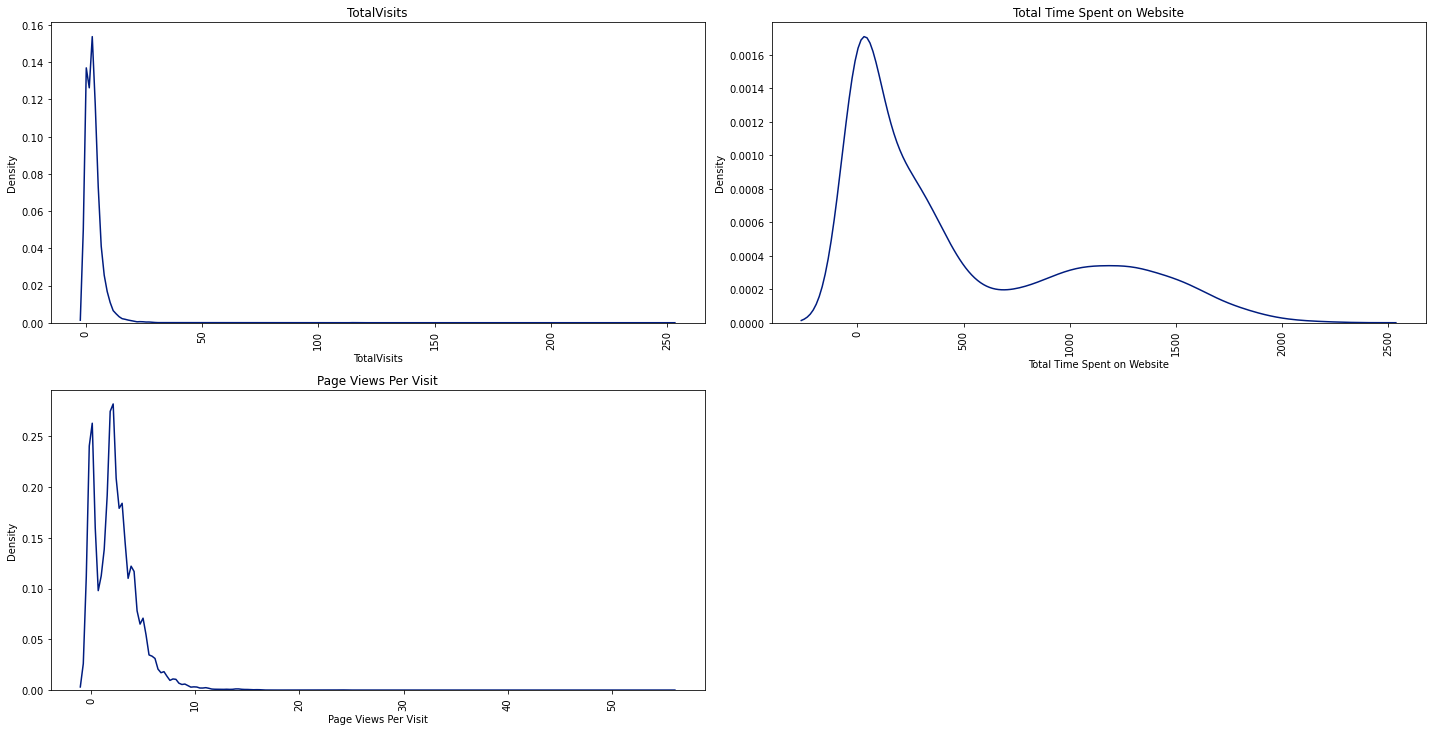

In [81]:
Required_columns= ['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']
sns.set_palette("dark")
plt.figure(figsize = (20, 20))


for col in enumerate(Required_columns):
    plt.subplot(4, 2, col[0]+1)
    plt.title(col[1])
    sns.distplot(lead[col[1]], hist =False)
    plt.tight_layout()
    plt.xticks(rotation = 90)

**Observation :** 

**Uni-variate Analysis:**


- The max probability for TotalVisits is found to be around 15-20. It increases initially but decreases further.
- The max probability for PageViewsPerVisit is found to be around to be 3-5
- The probability of time spent is found to be high for time between 0-300 seconds and decreases further.

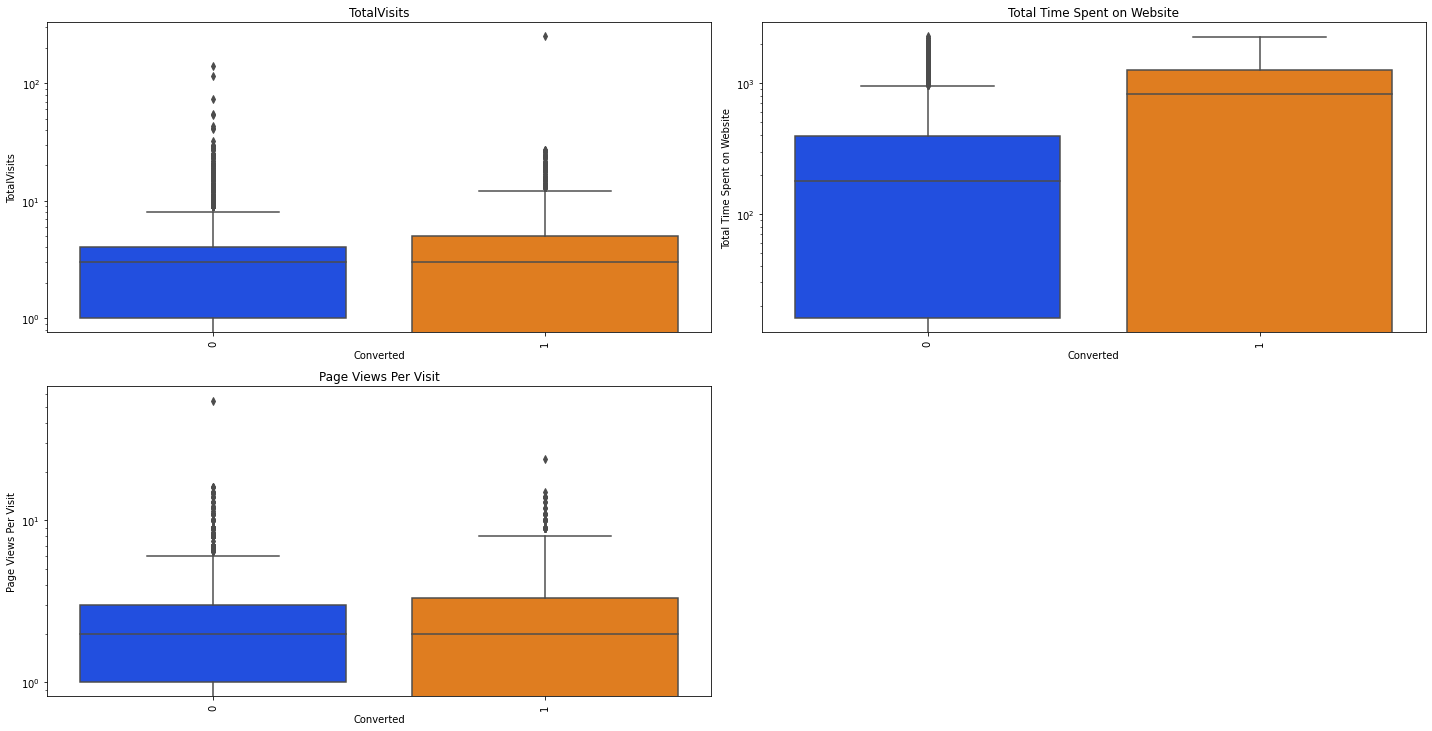

In [82]:
Required_columns= ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
sns.set_palette("bright")
plt.figure(figsize = (20, 20))


for col in enumerate(Required_columns):
    plt.subplot(4, 2, col[0]+1)
    plt.title(col[1])
    ax = sns.boxplot(x='Converted', y=col[1], data = lead)
    ax.set_yscale('log')
    plt.tight_layout()
    plt.xticks(rotation = 90)

**Observation :**

**Bi-variate Analysis:**

- The mean is found to be higher in case of Converted people rather than non-converted people. 
- The average page views for both converted and non converted is found to be the same. 
- The average total visits for both converted and non converted people is found to be the same.

**EDA - Categorical values**

In [83]:
leadCopy = lead.copy()

In [84]:
leadCopy.head(20)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.00,Page Visited on Website,Not Specified,Unemployed,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.50,Email Opened,Not Specified,Unemployed,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.00,Others,Media and Advertising,Unemployed,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.00,Converted to Lead,Not Specified,Unemployed,No
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,0,0.0,0,0.00,Olark Chat Conversation,Not Specified,Unemployed,No
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,No
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,0,0.0,0,0.00,Olark Chat Conversation,Not Specified,Unemployed,No
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,0,2.0,71,2.00,Email Opened,IT Projects Management,Unemployed,Yes
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,0,4.0,58,4.00,Email Opened,Finance Management,Unemployed,No


In [85]:
leadCopy['Category'] = leadCopy.Converted.astype('category')

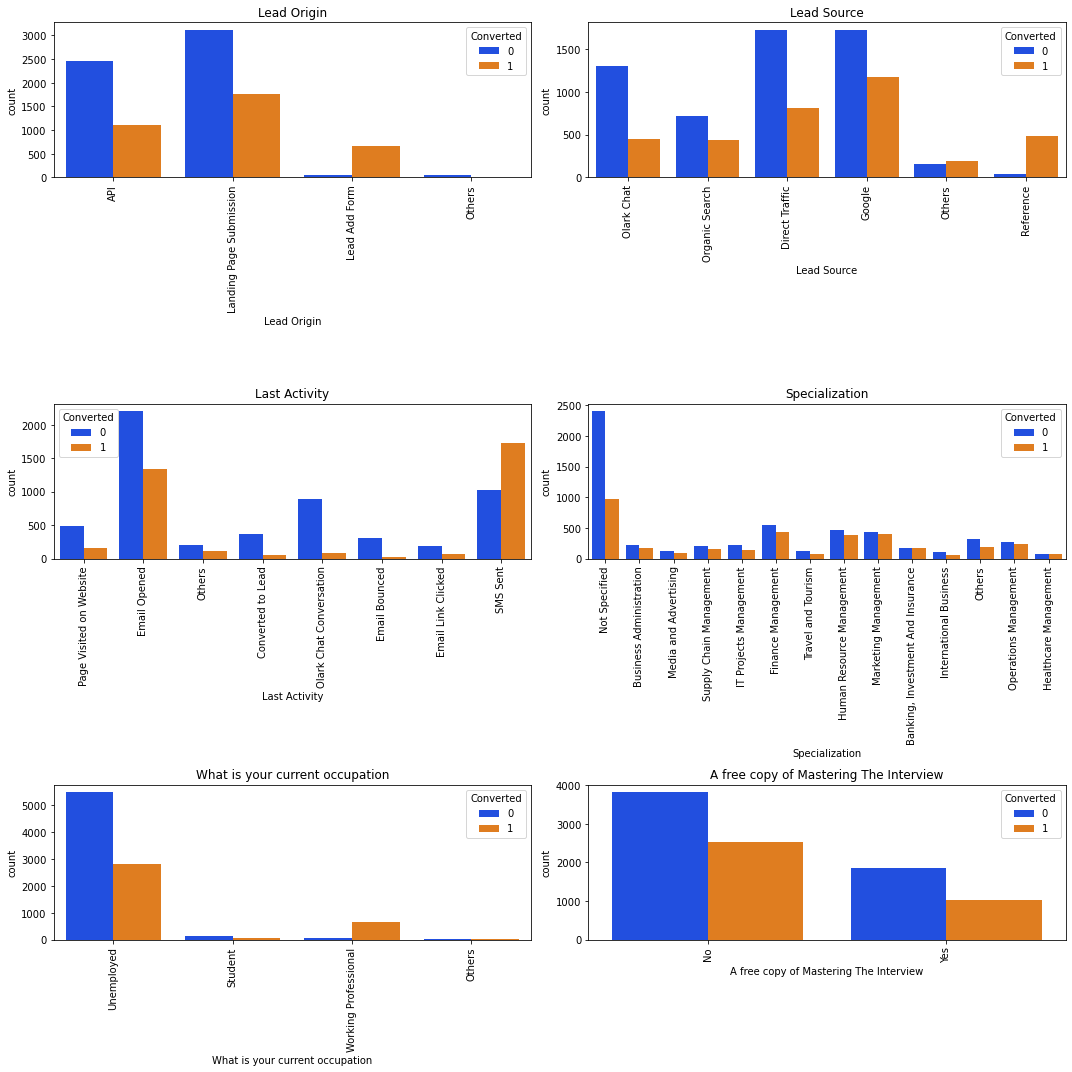

In [86]:
Required_columns= ['Lead Origin','Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'A free copy of Mastering The Interview']
sns.set_palette("bright")

plt.figure(figsize = (15, 15))

for col in enumerate(Required_columns):
    plt.subplot(3, 2, col[0]+1)
    plt.title(col[1])
    ax = sns.countplot(data = leadCopy, x=col[1], hue='Converted') 
    plt.xticks(rotation = 90)
    plt.tight_layout()

**Univariate analysis of Categorical data**

- The % of converted people is found to be greater for Landing Page Submission. We can also see that if Lead source is Add Form, the ratio of lead conversion is very high(almost not converted is very less).
- Google is found to be the important source for Lead Conversion
- It is clearly visible from the graph that we need to target the Unemployed and Working Professional to get a higher conversion rate. The ratio of conversion rate is higher than not converted people for working professionals. 
- We need to target people via Emails and SMS as it is found that the probability of response in case Converted leads is found to be higher. 
- We cannot infer much about conversion rate from specialisation as people who do not select any specialisation can also be converted to a lead but the ratio of non converted leads is higher than converted ones if they didn't choose specialisation.
- People usually don't subscribe for a free copy of mastering the interview.

## Outliers Handling 

In [87]:
#dtypes of all columns
lead.dtypes

Prospect ID                                object
Lead Number                                 int64
Lead Origin                                object
Lead Source                                object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
dtype: object

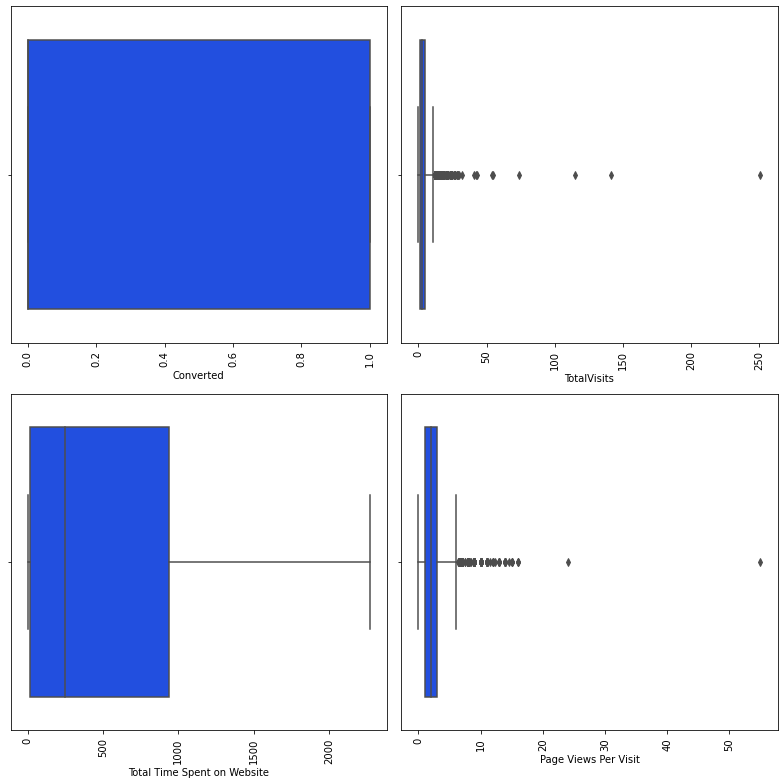

In [88]:
#There are 4 numerical columns - Converted , TotalVisits, Total Time Spent on Website, 'Page Views Per Visit

#Plotting them on box plot for outliers.

numerical_columns=['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']

plt.figure(figsize = (11, 11))
sns.set_palette('bright')
for col in enumerate(numerical_columns):
    plt.subplot(2,2, col[0]+1)
    sns.boxplot(x = col[1], data = lead)
    plt.xticks(rotation = 90)
    plt.tight_layout()

In [89]:
#TotalVisits and Page Views Per Visit have outliers
lead['TotalVisits'].describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [90]:
#diff1 will provide the difference between outliers and 99th percentile. 
#If the value is too big, we can conclude that there are outliers.
diff1 = lead.TotalVisits.max() - lead.TotalVisits.quantile(0.99)
diff1

234.0

In [91]:
lead['Page Views Per Visit'].describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [92]:
#diff2 will provide the difference between outliers and 99th percentile. 
#If the value is too big, we can conclude that there are outliers.
diff2 = lead['Page Views Per Visit'].max() - lead['Page Views Per Visit'].quantile(0.99)
diff2

46.0

**Capping Outliers**


- We Perform Soft Capping.
- We check only for outliers in the upper range that are > 99th percentile.

In [93]:
req_cols=['TotalVisits','Page Views Per Visit'] 
for col in req_cols:
    percentiles = lead[col].quantile(0.99)  ## capping higher range outliers
    lead[col][lead[col] >= percentiles] = percentiles

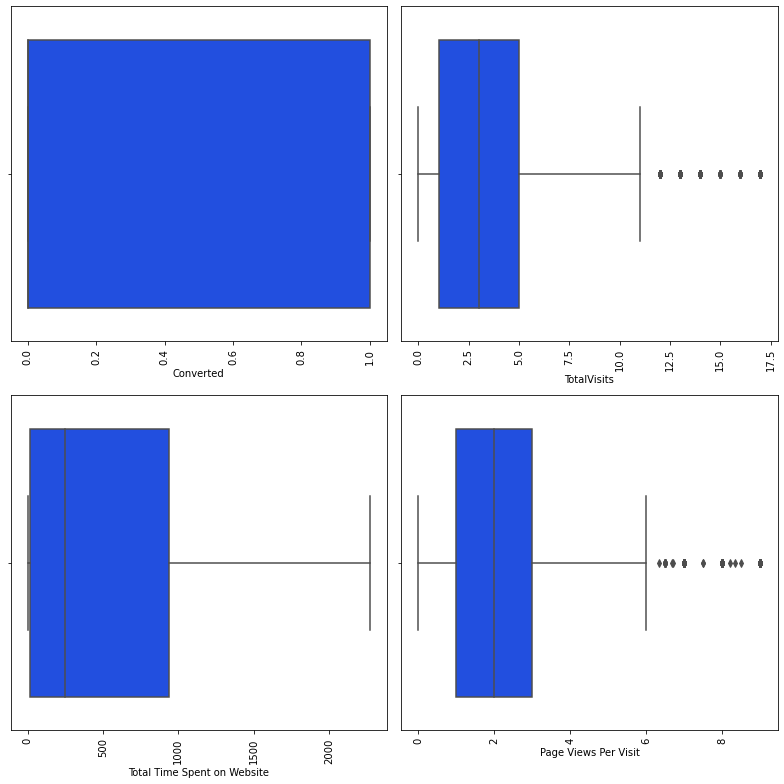

In [94]:
#Plotting the columns again to visualize after capping
numerical_columns=['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']

plt.figure(figsize = (11, 11))
sns.set_palette('bright')
for col in enumerate(numerical_columns):
    plt.subplot(2,2, col[0]+1)
    sns.boxplot(x = col[1], data = lead)
    plt.xticks(rotation = 90)
    plt.tight_layout()

## Preparing Data

steps:

1. Converting binary variable (Yes/No) "A free copy of Mastering The Interview" to 1/0
2. Create dummies for categorical columns
3. Perform train-test split
4. Perform Scaling

**Converting Binary Variables**


- Any kind of Data Preparation while performing Model Building involves converting Yes/No columns to binary values.

In [95]:
varlist =['A free copy of Mastering The Interview']

def binary_map(x):
  return x.map({'Yes' : 1, "No": 0})

lead[varlist] = lead[varlist].apply(binary_map)

In [96]:
lead.head(20)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.00,Page Visited on Website,Not Specified,Unemployed,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.50,Email Opened,Not Specified,Unemployed,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.00,Email Opened,Business Administration,Student,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.00,Others,Media and Advertising,Unemployed,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.00,Converted to Lead,Not Specified,Unemployed,0
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,0,0.0,0,0.00,Olark Chat Conversation,Not Specified,Unemployed,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,0
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,0,0.0,0,0.00,Olark Chat Conversation,Not Specified,Unemployed,0
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,0,2.0,71,2.00,Email Opened,IT Projects Management,Unemployed,1
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,0,4.0,58,4.00,Email Opened,Finance Management,Unemployed,0


**Preliminary step before creating dummies.**
- rename columns for better analysis.

In [97]:
#Checking columns
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [98]:
#Rename the columns

lead.rename(columns={'Total Time Spent on Website' : 'Time Spent', 'What is your current occupation':'Current Occupation', 'A free copy of Mastering The Interview':'Free Copy'}, inplace=True )

In [99]:
#Check if it has correctly been renamed 
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Time Spent', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Current Occupation', 'Free Copy'],
      dtype='object')

**Create Dummies for Categorical columns**

In [100]:
#Checking for categorical columns in the dataframe.
lead.dtypes

Prospect ID              object
Lead Number               int64
Lead Origin              object
Lead Source              object
Converted                 int64
TotalVisits             float64
Time Spent                int64
Page Views Per Visit    float64
Last Activity            object
Specialization           object
Current Occupation       object
Free Copy                 int64
dtype: object

In [101]:
#Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead[['Lead Origin','Lead Source','Last Activity','Specialization','Current Occupation']], drop_first=True)

In [102]:
#Adding the results to the master dataframe
lead = pd.concat([lead, dummy1], axis=1)

In [104]:
#Checking if the dummy-variables are added into the dataframe correctly.
lead.head(20)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Time Spent,Page Views Per Visit,Last Activity,Specialization,...,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.00,Page Visited on Website,Not Specified,...,0,0,1,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.50,Email Opened,Not Specified,...,0,0,1,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.00,Email Opened,Business Administration,...,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.00,Others,Media and Advertising,...,0,1,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.00,Converted to Lead,Not Specified,...,0,0,1,0,0,0,0,0,1,0
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,0,0.0,0,0.00,Olark Chat Conversation,Not Specified,...,0,0,1,0,0,0,0,0,1,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,1,2.0,1640,2.00,Email Opened,Supply Chain Management,...,0,0,0,0,0,1,0,0,1,0
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,0,0.0,0,0.00,Olark Chat Conversation,Not Specified,...,0,0,1,0,0,0,0,0,1,0
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,0,2.0,71,2.00,Email Opened,IT Projects Management,...,0,0,0,0,0,0,0,0,1,0
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,0,4.0,58,4.00,Email Opened,Finance Management,...,0,0,0,0,0,0,0,0,1,0


In [105]:
#Dropping original columns
lead.drop(['Lead Origin','Lead Source','Last Activity','Specialization','Current Occupation'],axis=1,inplace=True)

In [106]:
#Inspecting the dataframe again 
lead.head(20)

,Prospect ID,Lead Number,Converted,TotalVisits,Time Spent,Page Views Per Visit,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,...,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.00,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.50,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.00,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.00,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.00,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,0,0.0,0,0.00,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,1,2.0,1640,2.00,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,0,0.0,0,0.00,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,0,2.0,71,2.00,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,0,4.0,58,4.00,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [107]:
#Checking Datatypes
lead.dtypes

Prospect ID                                  object
Lead Number                                   int64
Converted                                     int64
TotalVisits                                 float64
Time Spent                                    int64
Page Views Per Visit                        float64
Free Copy                                     int64
Lead Origin_Landing Page Submission           uint8
Lead Origin_Lead Add Form                     uint8
Lead Origin_Others                            uint8
Lead Source_Google                            uint8
Lead Source_Olark Chat                        uint8
Lead Source_Organic Search                    uint8
Lead Source_Others                            uint8
Lead Source_Reference                         uint8
Last Activity_Email Bounced                   uint8
Last Activity_Email Link Clicked              uint8
Last Activity_Email Opened                    uint8
Last Activity_Olark Chat Conversation         uint8
Last Activit

**Observation :** 
- **We can see that mostly all columns are already converted into Integer/Numerical datatype.**
- **Hence, we can continue with our evaluation.**

## Splitting the data for Test-Train

In [108]:
#Importing required libraries to divide the data into test data and training data
from sklearn.model_selection import train_test_split

In [109]:
#Adding all feature columns to X Variable
X = lead.drop(['Converted','Prospect ID','Lead Number'], axis=1)

In [110]:
X.head(20)

,TotalVisits,Time Spent,Page Views Per Visit,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional
0,0.0,0,0.00,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,5.0,674,2.50,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,2.0,1532,2.00,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,305,1.00,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,2.0,1428,1.00,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
5,0.0,0,0.00,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
6,2.0,1640,2.00,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
7,0.0,0,0.00,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
8,2.0,71,2.00,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,4.0,58,4.00,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [111]:
#Adding our target column to Y Variable
y = lead['Converted']

In [112]:
y.head(20)

0     0
1     0
2     1
3     0
4     1
5     0
6     1
7     0
8     0
9     0
10    1
11    1
12    1
13    0
14    0
15    1
16    0
17    0
18    1
19    0
Name: Converted, dtype: int64

In [113]:
# Splitting the data into train and test (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

**Scaling all the required variables**

In [115]:
#Checking the dataframe again
X.head(20)

,TotalVisits,Time Spent,Page Views Per Visit,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional
0,0.0,0,0.00,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,5.0,674,2.50,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,2.0,1532,2.00,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,305,1.00,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,2.0,1428,1.00,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
5,0.0,0,0.00,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
6,2.0,1640,2.00,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
7,0.0,0,0.00,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
8,2.0,71,2.00,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,4.0,58,4.00,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [116]:
#We can see that columns except TotalVisits, Time Spent and Page Views Per Visit all the other columns are present in the range of 0 - 1, so we need to scale these variables as well.
scaler = StandardScaler()
X_train[['TotalVisits','Time Spent','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Time Spent','Page Views Per Visit']])
X_train.head()

,TotalVisits,Time Spent,Page Views Per Visit,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional
1871,-1.022595,-0.885371,-1.180474,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
6795,0.205373,0.005716,-0.503379,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3516,0.512365,-0.691418,0.092260,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
8105,0.512365,1.365219,1.364995,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3934,-1.022595,-0.885371,-1.180474,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [117]:
#Checking the mean and standard deviation
X_train.describe()

,TotalVisits,Time Spent,Page Views Per Visit,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional
count,6.468000e+03,6.468000e+03,6.468000e+03,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,...,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,-1.346411e-16,-1.609377e-16,-4.136731e-17,0.311843,0.528139,0.079468,0.005257,0.320037,0.190167,0.121058,...,0.093383,0.020563,0.367502,0.057205,0.055040,0.037570,0.021336,0.021027,0.897805,0.077613
std,1.000077e+00,1.000077e+00,1.000077e+00,0.463282,0.499246,0.270489,0.072318,0.466527,0.392463,0.326219,...,0.290991,0.141926,0.482162,0.232251,0.228076,0.190168,0.144512,0.143484,0.302929,0.267582
min,-1.022595e+00,-8.853708e-01,-1.180474e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.156027e-01,-8.634138e-01,-6.713803e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-1.016187e-01,-4.352528e-01,-1.622866e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,5.123653e-01,8.098906e-01,3.468071e-01,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,4.196269e+00,3.271816e+00,3.401369e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Observation : Standard Deviation is set to 1 and hence it is scaled correctly.**

**Conversion Rate before modelling**

In [118]:
#Checking the Converted Rate before modelling
Converted_Rate = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted_Rate

38.53896103896104

**Observation : We can see that conversion rate before modelling is found to be around 38.53%**

## Model Building

**Model - I**

In [119]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit()

In [120]:
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6432
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2687.3
Date:                Sun, 17 Jul 2022   Deviance:                       5374.6
Time:                        17:07:21   Pearson chi2:                 7.82e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [121]:
#Total number of columns
print(len(X_train.columns))

35


**Observation : We currently have around 35 columns for our evaluation.**

**Model - II : Feature Selection using RFE**

In [122]:
#Importing Logistic Regression module from SkLearn
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [123]:
#We currently have 35 features with respect to our discussion, and since 35 is a huge number we will reduce it to 20 columns using RFE.
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20) # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [124]:
#Printing all the columns that are selected using RFE
rfe.support_

array([ True,  True, False,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True, False, False, False, False, False,  True, False, False,
        True, False, False, False, False,  True,  True,  True])

In [125]:
#List of all columns on priority ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Time Spent', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Free Copy', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Others', True, 1),
 ('Lead Source_Google', False, 6),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 7),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 3),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 5),
 ('Specialization_Finance Management', False, 14),
 ('Specialization_Healthcare Management', False, 15),
 ('Specialization_Human Resource Management', False, 8),
 ('Specialization_IT Projects Management'

In [126]:
#This list will hold all the data that is being selected through RFE.
col = X_train.columns[rfe.support_]

In [127]:
col

Index(['TotalVisits', 'Time Spent', 'Free Copy',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Others', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_International Business',
       'Specialization_Not Specified', 'Current Occupation_Student',
       'Current Occupation_Unemployed',
       'Current Occupation_Working Professional'],
      dtype='object')

In [128]:
#Columns that have been rejected because of RFE.
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Last Activity_Page Visited on Website',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management', 'Specialization_Others',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism'],
      dtype='object')

#### **Assessing the model that has already been generated through RFE using Statsmodel - Model 2**

In [129]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2707.7
Date:                Sun, 17 Jul 2022   Deviance:                       5415.5
Time:                        17:08:01   Pearson chi2:                 8.09e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [130]:
# Check for the VIF values 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [131]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,Current Occupation_Unemployed,18.14
3,Lead Origin_Landing Page Submission,7.74
4,Lead Origin_Lead Add Form,6.88
8,Lead Source_Reference,6.19
16,Specialization_Not Specified,4.87
11,Last Activity_Email Opened,4.26
14,Last Activity_SMS Sent,3.66
6,Lead Source_Olark Chat,2.66
19,Current Occupation_Working Professional,2.33
12,Last Activity_Olark Chat Conversation,2.24


**Observations:-**

- **We see there are many variables with a high P-value and VIF value.**
- **We need to continue model building process to improve the model.**
- **Factors that are needed for consideration : VIF < 5% and P-Value < 5%**

**Inferences:-**
- **Lead Source_Others - has a P-value of 56.3%.** 
- **The above model has 20 features, and we need to reduce it further.**
- **Current Occupation_Unemployed has a VIF score of ~18.**

**Model- III [Dropping Lead_Source Others]**

In [132]:
col = col.drop('Lead Source_Others')
col

Index(['TotalVisits', 'Time Spent', 'Free Copy',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Others', 'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_International Business', 'Specialization_Not Specified',
       'Current Occupation_Student', 'Current Occupation_Unemployed',
       'Current Occupation_Working Professional'],
      dtype='object')

In [133]:
print(len(col))

19


In [134]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2707.9
Date:                Sun, 17 Jul 2022   Deviance:                       5415.8
Time:                        17:08:43   Pearson chi2:                 8.09e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [135]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,Current Occupation_Unemployed,18.10
3,Lead Origin_Landing Page Submission,7.73
15,Specialization_Not Specified,4.84
4,Lead Origin_Lead Add Form,4.75
7,Lead Source_Reference,4.44
10,Last Activity_Email Opened,4.26
13,Last Activity_SMS Sent,3.65
6,Lead Source_Olark Chat,2.63
18,Current Occupation_Working Professional,2.33
11,Last Activity_Olark Chat Conversation,2.24


**Inferences from the above model :-**

- **Current Occupation_Unemployed has a VIF score of ~18.**
- **Lead Origin_Others - has a P-value of 40.0%.**
- **The above model has 19 features, and we need to reduce it further.**

**For Model 4 - We need to remove Lead Origin_Others**

**Model - IV [Drop Lead Origin_Others]**

In [136]:
col = col.drop('Lead Origin_Others')
col

Index(['TotalVisits', 'Time Spent', 'Free Copy',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_International Business', 'Specialization_Not Specified',
       'Current Occupation_Student', 'Current Occupation_Unemployed',
       'Current Occupation_Working Professional'],
      dtype='object')

In [137]:
print(len(col))

18


In [138]:
#Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2708.3
Date:                Sun, 17 Jul 2022   Deviance:                       5416.6
Time:                        17:09:17   Pearson chi2:                 8.09e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [139]:
#Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,Current Occupation_Unemployed,17.99
3,Lead Origin_Landing Page Submission,7.65
14,Specialization_Not Specified,4.84
4,Lead Origin_Lead Add Form,4.73
6,Lead Source_Reference,4.44
9,Last Activity_Email Opened,4.25
12,Last Activity_SMS Sent,3.65
5,Lead Source_Olark Chat,2.59
17,Current Occupation_Working Professional,2.32
10,Last Activity_Olark Chat Conversation,2.24


**Inferences from the above model :-**

- **Current Occupation_Student - has a P-value of 32.47%.**
- **The above model has 18features, and we need to reduce it further.**
- **Current Occupation_Unemployed has a VIF score of ~18.**

**For Model - 5, we need to remove Current Occupation_Student and then proceed further.**

**Model - V [Drop Current_Occupation_Student]**

In [140]:
#Dropping "Current Occupation_Student" for further evaluation

col = col.drop('Current Occupation_Student')

In [142]:
#Printing all the features and the total number of features that we consider for further model building.
print(col)

Index(['TotalVisits', 'Time Spent', 'Free Copy',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_International Business', 'Specialization_Not Specified',
       'Current Occupation_Unemployed',
       'Current Occupation_Working Professional'],
      dtype='object')


In [143]:
print(len(col))

17


In [144]:
#Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2708.8
Date:                Sun, 17 Jul 2022   Deviance:                       5417.6
Time:                        17:09:54   Pearson chi2:                 8.11e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [145]:
# Create a df that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Current Occupation_Unemployed,12.91
3,Lead Origin_Landing Page Submission,6.52
4,Lead Origin_Lead Add Form,4.72
6,Lead Source_Reference,4.40
14,Specialization_Not Specified,4.21
9,Last Activity_Email Opened,3.84
12,Last Activity_SMS Sent,3.40
5,Lead Source_Olark Chat,2.54
2,Free Copy,2.20
10,Last Activity_Olark Chat Conversation,2.14


In [146]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Current Occupation_Unemployed,12.91
3,Lead Origin_Landing Page Submission,6.52
4,Lead Origin_Lead Add Form,4.72
6,Lead Source_Reference,4.40
14,Specialization_Not Specified,4.21
9,Last Activity_Email Opened,3.84
12,Last Activity_SMS Sent,3.40
5,Lead Source_Olark Chat,2.54
2,Free Copy,2.20
10,Last Activity_Olark Chat Conversation,2.14


**Inferences from the above model :-**

- **Specialization International_Business - has a P-value of 13.5%.** 
- **The above model has 17 features, and we need to reduce it further.**
- **Current Occupation_Unemployed has a VIF score of ~13.**

**For further model building [Model - 6], we need to remove Specialization International_Business and proceed.**

**Model - VI [Drop Specialization_International Business]**

In [147]:
#Dropping "Specialization International_Business" for model building improvement
col = col.drop('Specialization_International Business', 1)
col

Index(['TotalVisits', 'Time Spent', 'Free Copy',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Not Specified', 'Current Occupation_Unemployed',
       'Current Occupation_Working Professional'],
      dtype='object')

In [148]:
print(len(col))

16


In [149]:
#Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2709.9
Date:                Sun, 17 Jul 2022   Deviance:                       5419.9
Time:                        17:10:16   Pearson chi2:                 8.10e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

**Inferences from the above model :-**

- **Last Activity_Email Link Clicked - has a P-value of 11.5%.** 
- **The above model has 16 features, and we need to reduce it further.**
- **Current Occupation_Unemployed has a VIF score of ~13.**

**For further model building [Model - 7], we need to remove Last Activity_Email Link Clicked and proceed.**

**Model - VII [Drop Last Activity_Email Link Clicked ]**

In [150]:
#Dropping "Last Activity Email Link Clicked" to improve the model.
col = col.drop('Last Activity_Email Link Clicked', 1)

In [151]:
#Printing all the required features considered for model building
print(col)

Index(['TotalVisits', 'Time Spent', 'Free Copy',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Not Specified',
       'Current Occupation_Unemployed',
       'Current Occupation_Working Professional'],
      dtype='object')


In [152]:
print(len(col))

15


In [153]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2711.1
Date:                Sun, 17 Jul 2022   Deviance:                       5422.3
Time:                        17:10:26   Pearson chi2:                 8.11e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

**Inferences from the above model :-**

- **All P-Values are less than 5%, now lets check for VIF.**
- **The above model has 15 features, and we need to reduce it further.**

In [154]:
#Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [155]:
#Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Current Occupation_Unemployed,12.20
3,Lead Origin_Landing Page Submission,6.49
4,Lead Origin_Lead Add Form,4.72
6,Lead Source_Reference,4.40
12,Specialization_Not Specified,4.18
8,Last Activity_Email Opened,3.32
11,Last Activity_SMS Sent,2.98
5,Lead Source_Olark Chat,2.51
2,Free Copy,2.20
9,Last Activity_Olark Chat Conversation,1.95


**Current occupation_Unemployed has a high VIF of 12.20 and we need to reduce this further.**

**Model - VIII [Drop Current Occupation_Unemployed ]**

In [156]:
#Dropping "Current Occupation_Employed" because of high VIF
col = col.drop('Current Occupation_Unemployed', 1)

In [157]:
#Displaying all the features and the number of features for our model building. 
print(col)

Index(['TotalVisits', 'Time Spent', 'Free Copy',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Not Specified',
       'Current Occupation_Working Professional'],
      dtype='object')


In [158]:
print(len(col))

14


In [159]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2714.0
Date:                Sun, 17 Jul 2022   Deviance:                       5428.0
Time:                        17:10:45   Pearson chi2:                 8.15e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [160]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,4.66
6,Lead Source_Reference,4.36
3,Lead Origin_Landing Page Submission,3.99
8,Last Activity_Email Opened,2.68
12,Specialization_Not Specified,2.68
11,Last Activity_SMS Sent,2.48
5,Lead Source_Olark Chat,2.39
2,Free Copy,2.16
9,Last Activity_Olark Chat Conversation,1.82
0,TotalVisits,1.45


**After multiple re-runs and improving the model upto 8 times, we can say that, all the selected features have a P-value < 5%. and VIF value < 5**

**Thus, 8th model is our final model.**

**Prediction of Y - values, as per the final model.**

In [161]:
#Getting the predicted values on the train set
#X_train_sm will provide the predictor variable. 
#res will contain the Logistic Regression model result
#y_train_Pred will provide us the Predicted Y Values for the given feature variables.

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.458895
6795    0.064739
3516    0.310168
8105    0.798414
3934    0.213689
4844    0.989374
3297    0.106106
8071    0.994567
987     0.155379
7423    0.856092
dtype: float64

In [162]:
#Reshaping the predicted probabilities so that it returns an array of Conversion_Probabilities.
y_train_pred = y_train_pred.values.reshape(-1)

#### **Creation of DataFrame - with the predicted Y values.**

In [163]:
#Creating a data frame with the actual Converted score and Probability of conversion

#The dataframe is stored in the variable y_train_pred_final.

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Cust_Id'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Cust_Id
0,0,0.458895,1871
1,0,0.064739,6795
2,0,0.310168,3516
3,0,0.798414,8105
4,0,0.213689,3934


In [164]:
#Mapping the prediction conversion Rate according to the probability cut off.
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Cust_Id,predicted
0,0,0.458895,1871,0
1,0,0.064739,6795,0
2,0,0.310168,3516,0
3,0,0.798414,8105,1
4,0,0.213689,3934,0


#### **Calculation of Metrics for the final model**

In [165]:
#Importing the required libraries for metric calculation
from sklearn import metrics

# Confusion matrix - Final Model 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3578  424]
 [ 811 1655]]


In [166]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8090599876314162


In [168]:
#Calculation of Final Model characteristics.
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [169]:
#Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6711273317112734

In [170]:
#Let's calculate specificity
TN / float(TN+FP)

0.8940529735132434

In [171]:
#Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10594702648675662


In [172]:
#Negative predictive value
print (TN / float(TN+ FN))

0.8152198678514468


**ROC Curve and its parameters**

In [173]:
#Function to plot and draw ROC curve.
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [174]:
#Calculation and FPR and TPR and thresholds for trade off Sensitivity and Specificity.
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

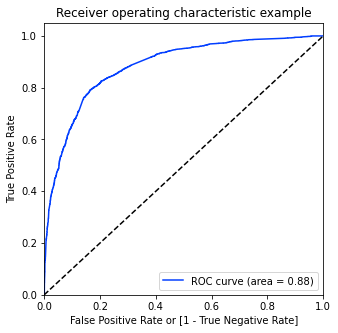

In [175]:
#Invoking the function to plot ROC - Curve. 
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

**The ROC curve is plotted to find the trade off between Sensitivity and Specificity.**

In [176]:
#Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Cust_Id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.458895,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.064739,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.310168,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.798414,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.213689,3934,0,1,1,1,0,0,0,0,0,0,0


In [177]:
#Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.599567  0.972425  0.369815
0.2   0.2  0.724799  0.925385  0.601199
0.3   0.3  0.798392  0.838200  0.773863
0.4   0.4  0.818027  0.777778  0.842829
0.5   0.5  0.809060  0.671127  0.894053
0.6   0.6  0.797619  0.596918  0.921289
0.7   0.7  0.780767  0.513382  0.945527
0.8   0.8  0.756957  0.414031  0.968266
0.9   0.9  0.708565  0.252636  0.989505


#### **Intersection between Accuracy - Sensitivity and Specificity**

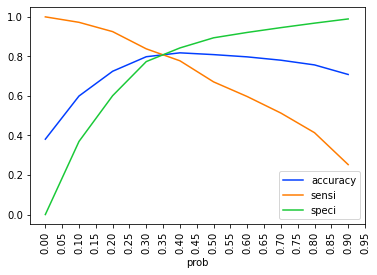

<Figure size 792x792 with 0 Axes>

In [178]:
#Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0, 1, step=0.05), rotation = 90)
plt.figure(figsize=(11,11))
plt.tight_layout()
plt.show()

**From the curve above, 0.35 is the point to take it as a cutoff probability.**

#### **Calculation of predicted values on the score : 0.35**

In [179]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Cust_Id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.458895,1871,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.064739,6795,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.310168,3516,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.798414,8105,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.213689,3934,0,1,1,1,0,0,0,0,0,0,0,0


#### **Metrics calculation for after choosing final probability cut off.**

In [180]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8119975262832406

In [181]:
#Confusion matrix after probability cutoff : 0.35 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3268,  734],
       [ 482, 1984]], dtype=int64)

In [182]:
#Confusion Matrix - Calculating all parameters.
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [183]:
#Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8045417680454177

In [184]:
#Let us calculate specificity
TN / float(TN+FP)

0.816591704147926

In [185]:
#Calculate false postive rate - predicting conversion rate when customer will be a hot lead or not
print(FP/ float(TN+FP))

0.18340829585207397


In [186]:
#Positive predictive value 
print (TP / float(TP+FP))

0.7299484915378955


In [187]:
#Negative predictive value
print (TN / float(TN+ FN))

0.8714666666666666


**ACCURACY - SPECIFICITY - SENSITIVITY**

- **ACCURACY - 81.19%**
- **SENSITIVITY - 80.45%**
- **SPECIFICITY - 81.7%**

### Model Evaluation - ON TEST SET

In [188]:
#Perform all the scaling on the available features.
X_test[['TotalVisits','Time Spent','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Time Spent','Page Views Per Visit']])

In [189]:
#Selecting all the features, which are selected as per final model
#col has all the features available in the final model.

X_test = X_test[col]
X_test.head()

,TotalVisits,Time Spent,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Not Specified,Current Occupation_Working Professional
4269,1.433341,0.964504,0,0,0,0,0,0,0,0,0,1,1,0
2376,-1.022595,-0.885371,0,0,1,0,1,0,0,0,0,1,1,0
7766,0.512365,-0.777416,0,0,0,0,0,0,0,0,1,0,0,1
9199,-1.022595,-0.885371,0,0,0,1,0,0,0,1,0,0,1,0
4359,-1.022595,-0.885371,0,0,1,0,1,0,1,0,0,0,0,0


### Building the model - ON TEST SET

In [190]:
#Adding a constant for X_Test.
X_test_sm = sm.add_constant(X_test)

In [191]:
#y_test_pred - X_test_sm has all the features after model building
#res = > Result of model building

y_test_pred = res.predict(X_test_sm)

In [192]:
#Displaying all the predicted values
y_test_pred[:10]

4269    0.733731
2376    0.858812
7766    0.826093
9199    0.057037
4359    0.864181
9186    0.559817
1631    0.465935
8963    0.139994
8007    0.085739
5324    0.307222
dtype: float64

### **Creating a dataframe with predicted values**

In [193]:
#Converting y_pred to a dataframe which is an array
y_test_pred_1 = pd.DataFrame(y_test_pred)
y_test_pred_1.head()

,0
4269,0.733731
2376,0.858812
7766,0.826093
9199,0.057037
4359,0.864181


In [194]:
#Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [195]:
#Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [196]:
#Removing index for both dataframes to append them side by side 
y_test_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [197]:
#Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred_1],axis=1)

In [198]:
y_pred_final.head(20)

,Converted,CustID,0
0,1,4269,0.733731
1,1,2376,0.858812
2,1,7766,0.826093
3,0,9199,0.057037
4,1,4359,0.864181
5,1,9186,0.559817
6,1,1631,0.465935
7,1,8963,0.139994
8,0,8007,0.085739
9,1,5324,0.307222


In [199]:
#Renaming column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [200]:
#Predicting the test model on cut off probabilty
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [201]:
#Displaying the predicted value dataframe.
y_pred_final.head(20)

,Converted,CustID,Conversion_Prob,final_predicted
0,1,4269,0.733731,1
1,1,2376,0.858812,1
2,1,7766,0.826093,1
3,0,9199,0.057037,0
4,1,4359,0.864181,1
5,1,9186,0.559817,1
6,1,1631,0.465935,1
7,1,8963,0.139994,0
8,0,8007,0.085739,0
9,1,5324,0.307222,0


## Model Evaluation

In [202]:
#check the accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8008658008658008

In [203]:
confusionTest= metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusionTest

array([[1348,  329],
       [ 223,  872]], dtype=int64)

In [204]:
TP = confusionTest[1,1] # true positive 
TN = confusionTest[0,0] # true negatives
FP = confusionTest[0,1] # false positives
FN = confusionTest[1,0] # false negatives

In [205]:
#Let's see the sensitivity of our logistic regression model
sensitivity = round(TP / float(TP+FN),2) *100 
print(sensitivity)

80.0


In [206]:
#Let's calculate specificity
TN / float(TN+FP)

0.8038163387000596

**ACCURACY - SPECIFICITY - SENSITIVITY**

- **ACCURACY - 80.08%**
- **SENSITIVITY - 80.0%**
- **SPECIFICITY - 80.3%**

## OBSERVATION : 

**We got 0.5% to 1% difference on train and test data's performance metrics.This implies that our final model didn't overfit training data and is performing well.**

**From our model, We can conclude following points :**
    
**1. The customer/leads who fills the form are the potential leads.**

**2. We must majorly focus on working professionals.**

**3. We must majorly focus on leads whose last activity is SMS sent or Email opened.** 

**4. It’s always good to focus on customers, who have spent significant time on our website.**

**5. It’s better to focus least on customers to whom the sent mail is bounced back.**

**6. If the lead source is referral, he/she may not be the potential lead.**

**7. If the lead didn’t fill specialization, he/she may not know what to study and are not right people to target. So, it’s better to focus less on such cases.**

## LEAD SCORE - ASSIGNMENT TO ALL CUSTOMERS

In [207]:
#Preparing the dataframe - to scale the variables and prepare the complete data.
X[['TotalVisits','Time Spent','Page Views Per Visit']] = scaler.transform(X[['TotalVisits','Time Spent','Page Views Per Visit']])

In [208]:
#Selecting the features in our final model on the scaled dataframe.
X = X[col]
X.head()

,TotalVisits,Time Spent,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Not Specified,Current Occupation_Working Professional
0,-1.022595,-0.885371,0,0,0,1,0,0,0,0,0,0,1,0
1,0.512365,0.347879,0,0,0,0,0,0,1,0,0,0,1,0
2,-0.408611,1.917803,1,1,0,0,0,0,1,0,0,0,0,0
3,-0.715603,-0.327298,0,1,0,0,0,0,0,0,1,0,0,0
4,-0.408611,1.727509,0,1,0,0,0,0,0,0,0,0,1,0


In [209]:
#Adding a constant to the dataframe
X_sm = sm.add_constant(X)

In [210]:
#Predicting the y-values on X dataframe (Leads.csv)
y_ans_pred = res.predict(X_sm)

In [211]:
#Printing the probabilities
y_ans_pred[:10]

0    0.107220
1    0.286904
2    0.591466
3    0.128387
4    0.187359
5    0.057037
6    0.710450
7    0.057037
8    0.078954
9    0.264265
dtype: float64

In [212]:
#Converting y_pred to a dataframe which is an array
y_ans_pred_df = pd.DataFrame(y_ans_pred)

In [213]:
#Converting y to dataframe
y_df = pd.DataFrame(y)

In [214]:
#Putting Lead_Number to index
y_df['Lead_Number'] = lead['Lead Number']

In [215]:
#Removing index for both dataframes to append them side by side 
y_ans_pred_df.reset_index(drop=True, inplace=True)
y_df.reset_index(drop=True, inplace=True)

In [216]:
#Appending y_test_df and y_df
y_ans_final = pd.concat([y_df, y_ans_pred_df],axis=1)

In [217]:
#Renaming the column 
y_ans_final= y_ans_final.rename(columns={ 0 : 'Conversion_Prob'})

In [218]:
#Displaying the Answer_Dataframe
y_ans_final.head()

,Converted,Lead_Number,Conversion_Prob
0,0,660737,0.107220
1,0,660728,0.286904
2,1,660727,0.591466
3,0,660719,0.128387
4,1,660681,0.187359


### **Finding the converted value using the probability cut-off = 0.35**

In [219]:
#Finding the Predicted values using the probability cut off
y_ans_final['final_predicted'] = y_ans_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [220]:
#Appending the score to the dataframe.
y_ans_final['Score'] = round(y_ans_final['Conversion_Prob'] * 100, 2)

In [221]:
#Displaying the predicted conversion on the final values
y_ans_final.head(20)

,Converted,Lead_Number,Conversion_Prob,final_predicted,Score
0,0,660737,0.107220,0,10.72
1,0,660728,0.286904,0,28.69
2,1,660727,0.591466,1,59.15
3,0,660719,0.128387,0,12.84
4,1,660681,0.187359,0,18.74
5,0,660680,0.057037,0,5.70
6,1,660673,0.710450,1,71.04
7,0,660664,0.057037,0,5.70
8,0,660624,0.078954,0,7.90
9,0,660616,0.264265,0,26.43


### **Metric Calculation - Complete Dataframe**

In [222]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_ans_final.Converted, y_ans_final.final_predicted)

0.8086580086580086

In [223]:
#Confusion Matrix
confusionAns= metrics.confusion_matrix(y_ans_final.Converted, y_ans_final.final_predicted)
confusionAns

array([[4616, 1063],
       [ 705, 2856]], dtype=int64)

In [224]:
#Confusion Matrix - Parameters
TP = confusionAns[1,1] # true positive 
TN = confusionAns[0,0] # true negatives
FP = confusionAns[0,1] # false positives
FN = confusionAns[1,0] # false negatives

In [225]:
# Let's see the sensitivity of our logistic regression model
sensitivity = round(TP / float(TP+FN),2) *100 
print(sensitivity)

80.0


In [226]:
# Let us calculate specificity
TN / float(TN+FP)

0.812819158302518

## Sorting Dataframe - to find top leads

In [227]:
#Sorting values to find the top leads. 
ResultDf = y_ans_final.sort_values(by='Score', ascending=False)

In [228]:
#Displaying the top leads
ResultDf.head()

,Converted,Lead_Number,Conversion_Prob,final_predicted,Score
2656,1,634047,0.999681,1,99.97
3478,1,627106,0.999659,1,99.97
8074,1,588037,0.999566,1,99.96
3428,1,627462,0.999458,1,99.95
5921,1,604411,0.999389,1,99.94


In [229]:
FilteredResult = ResultDf.loc[ResultDf['Score'] >= 35]

In [230]:
print(ResultDf.shape)
print(FilteredResult.shape)

(9240, 5)
(3919, 5)


In [231]:
FilteredResult.head(20)

,Converted,Lead_Number,Conversion_Prob,final_predicted,Score
2656,1,634047,0.999681,1,99.97
3478,1,627106,0.999659,1,99.97
8074,1,588037,0.999566,1,99.96
3428,1,627462,0.999458,1,99.95
5921,1,604411,0.999389,1,99.94
7579,1,591536,0.999355,1,99.94
6751,1,598055,0.999298,1,99.93
5671,1,606508,0.999140,1,99.91
9015,1,581257,0.999054,1,99.91
8081,1,588013,0.999131,1,99.91


In [232]:
#Checking the Converted Rate
Converted_Rate_AfterModelling= (sum(FilteredResult['Converted'])/len(FilteredResult['Converted'].index))*100
Converted_Rate_AfterModelling

72.87573360551161

**Observation - We provide a list of only 4000 who have the chances of getting converted into a potential lead so it is easier for the company to limit their target. When we check for conversion rate, it is found to be around 73%.**

### Sorting The Dataframe - To Find The Hot Leads With Higher Conversion Rate.

In [233]:
HotLeads = ResultDf.loc[ResultDf['Score'] >= 95]

In [234]:
HotLeads.shape

(716, 5)

In [235]:
#Checking the Converted Rate
Converted_Rate_ForHotLeads= (sum(HotLeads['Converted'])/len(HotLeads['Converted'].index))*100
Converted_Rate_ForHotLeads

95.94972067039106

**we are able to provide a list of only 716 customers who are mostly getting converted to a lead, so it is easier for the company to limit their target. When we check for conversion rate, it is found to be around 96%. 
This list aims to target the top 10% of the customers.**

## CONCLUSION:

- **Conversion Rate for hot leads is increases from 73% to 96%. This means they have a 96% probability of getting converted to a lead.**

- **Focusing on Hot Leads will increase the chances of obtaining more value to the business as the number of people we contact are less but the conversion rate is high.**

**From our model, we can conclude the below points :**

- customers who fills the form are most likelythe potential leads.
- majorly focus on working professionals.
- majorly focus on leads whose last activity is SMS sent or Email opened.
- If the lead source is referral, he/she may not be the potential lead.
- If the lead didn’t fill specialization, he/she may not know what to study and are not right people to target.
- Its always good to focus on customers, who have spent more time on our website.
- Its better to focus least on customers to whom the sent mail is bounced back.


##  RECOMMENDATIONS:

- **Its good to collect data often and run the model and get updated with the potential leads. There is a belief that the best time to call your potential leads is within few hours after the lead shows interest in the courses.**

- **Along with phone calls, it’s good to mail the leads also to keep them reminding as email is as powerful as cold calling.**

- **Reducing the number of call attempts to 2-4 and increasing the frequency of usage of other media like advertisements in Google, or via emails to keep in touch with the lead will save a lot of time.**

- **Focusing on Hot Leads will increase the chances of obtaining more value to the business as the number of people we contact are less but the conversion rate is high.**